In [8]:
import numpy as np
import os 
os.environ["LOKY_MAX_CPU_COUNT"] = "4"
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

In [3]:
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

In [4]:
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

In [5]:
graph.data = np.exp(-graph.data / graph.data.std())

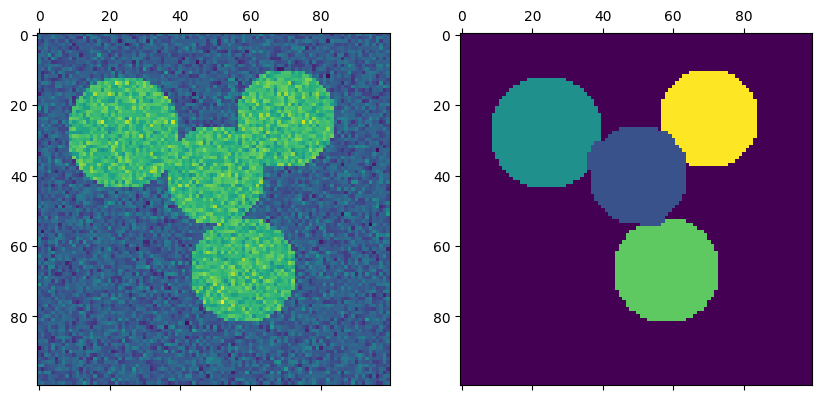

In [9]:
import matplotlib.pyplot as plt

from sklearn.cluster import spectral_clustering

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

In [10]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs

In [11]:
X,_ = make_blobs(n_samples=500,n_features=5)

In [14]:
spectral = SpectralClustering(n_clusters=3)
spectral.fit(X)

SpectralClustering(n_clusters=3)

In [15]:
spectral.labels_

array([1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 1, 0,
       2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2,
       1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1,
       0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 2, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1,
       2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2,
       2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1,

In [16]:
_

array([0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 1,
       0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0,
       2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1,
       1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0,